## Amazon Commerce Reviews 
URL : https://www.kaggle.com/c/184702-tu-ml-ss-20-amazon-commerce-reviews

This data set includes Amazon Reviews Records. It is used for authorship such as authorship identification of online texts. We have a multiclass classification problem with 50 classes in total.

Number of Instances: 750

Attribute Characteristics: numeric, categorical

Number of Attributes: 10002

Missing Values: NA

The target variable is the Class. 

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
import time
from sklearn.dummy import DummyClassifier
import re
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.model_selection import KFold, StratifiedShuffleSplit, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

import seaborn as sns

%matplotlib inline

In [24]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/184702-tu-ml-ss-20-amazon-commerce-reviews/amazon_review_ID.shuf.sol.ex.csv
/kaggle/input/184702-tu-ml-ss-20-amazon-commerce-reviews/amazon_review_ID.shuf.tes.csv
/kaggle/input/184702-tu-ml-ss-20-amazon-commerce-reviews/amazon_review_ID.shuf.lrn.csv


In [25]:
data = pd.read_csv("/kaggle/input/184702-tu-ml-ss-20-amazon-commerce-reviews/amazon_review_ID.shuf.lrn.csv")
test = pd.read_csv("/kaggle/input/184702-tu-ml-ss-20-amazon-commerce-reviews/amazon_review_ID.shuf.tes.csv")

In [26]:
data.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000,Class
0,0,8,6,10,6,7,2,2,2,3,...,1,0,0,0,0,0,0,0,0,Chell
1,1,13,1,13,9,8,8,2,3,2,...,4,1,2,1,0,1,0,0,0,Engineer
2,2,16,7,6,7,9,3,4,2,6,...,0,0,0,0,1,0,0,0,0,Grove
3,3,8,11,10,11,3,7,0,4,2,...,0,0,1,0,0,0,2,1,0,Davisson
4,4,10,11,8,5,3,4,2,5,5,...,0,0,0,0,0,0,0,0,0,Wilson


Our target attribute is 'Class'. As we can see below, we have a multiclass classification problem with 50 classes.

In [27]:
print(data['Class'].value_counts())
print(data['Class'].nunique())

Chell          21
Hayes          20
Chachra        19
Lovitt         19
Shea           18
Mahlers2nd     18
Agresti        18
Lee            18
Ashbacher      17
Davisson       17
Peterson       17
Morrison       17
Mark           17
Cholette       17
Nigam          17
Calvinnme      16
Grove          16
McKee          16
Merritt        16
Robert         16
Janson         16
Auken          16
Riley          16
Neal           16
Harp           16
Sherwin        15
Vernon         15
Kolln          15
Comdet         15
Cutey          15
Blankenship    14
Bukowsky       14
Messick        14
Corn           14
Koenig         14
Lawyeraau      13
Taylor         13
Mitchell       13
Chandler       13
Power          13
Walters        13
Dent           12
Goonan         12
Engineer       12
Brown          11
Brody          11
Wilson         11
Vision         10
Johnson        10
CFH             8
Name: Class, dtype: int64
50


Our dataset contains 10002 columns including the target, so we have 10001 predictors, which are numeric, and the target is object type. We have 750 entries in our dataset

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Columns: 10002 entries, ID to Class
dtypes: int64(10001), object(1)
memory usage: 57.2+ MB


In [29]:
data.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000
count,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,374.50000,11.810667,7.424000,6.745333,6.502667,6.140000,4.641333,3.730667,3.614667,2.941333,...,0.210667,0.244000,0.205333,0.192000,0.224000,0.220000,0.216000,0.182667,0.229333,0.192000
std,216.65064,5.715684,3.473948,3.368819,3.872034,3.241977,2.826661,3.988568,2.322364,2.109619,...,0.547740,0.681971,0.517231,0.594087,0.568849,0.488451,0.502342,0.467894,0.496388,0.512008
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,187.25000,8.000000,5.000000,4.000000,4.000000,4.000000,2.250000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,374.50000,11.000000,7.000000,7.000000,6.000000,6.000000,4.000000,2.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,561.75000,15.000000,10.000000,9.000000,9.000000,8.000000,6.000000,6.000000,5.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,749.00000,32.000000,21.000000,20.000000,25.000000,19.000000,14.000000,21.000000,14.000000,13.000000,...,4.000000,6.000000,4.000000,8.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000


**ID** column will be dropped because it's not predictive:

In [30]:
data = data.drop(['ID'], axis=1)
data_test = test.drop(['ID'], axis=1)

We check for missing values: 

In [31]:
data.isnull().any().sum()

0

We don't have any missing values.

In [32]:
data["Class"]= data["Class"].astype("category")

In [33]:
X = data.drop(['Class'], axis=1)
y = data['Class']

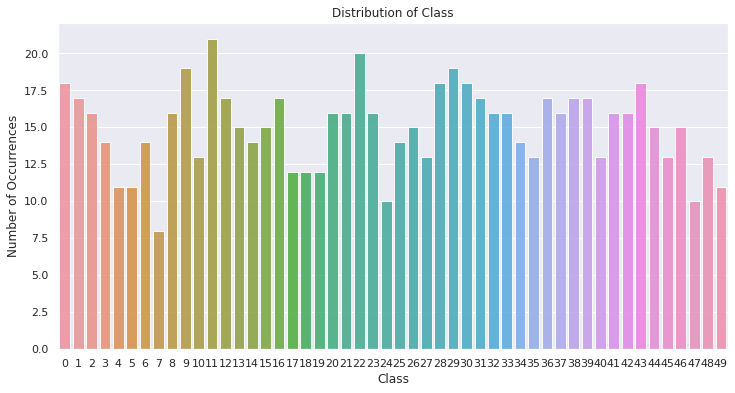

In [34]:
le = preprocessing.LabelEncoder()
plt.figure(figsize=(12,6))
classes_count = y.value_counts()
sns.set(style="darkgrid")
sns.barplot(le.fit_transform(classes_count.index), classes_count.values, alpha=0.9)
plt.title('Distribution of Class')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.show()

We will check for duplicates:

In [35]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
# data = data.drop_duplicates()
# data.shape

Number of duplicate rows = 2


We have two duplicate rows, but we won't remove them because we don't have much data to work with and we observed that the results of the algorithms are slightly better when we keep them.

In [36]:
randNum = 1234

We will create two DummyClassifiers with strategies _most_frequent_ and _uniform_ as baselines to compare with the other classifiers we will use:

In [37]:

dummy_clf_mf = DummyClassifier(strategy="most_frequent", random_state=randNum)
dummy_clf_mf.fit(X, y)
dummy_clf_mf.predict(X)
print("Most frequent baseline classifier score:", dummy_clf_mf.score(X, y))

dummy_clf_u = DummyClassifier(strategy="uniform", random_state=randNum)
dummy_clf_u.fit(X, y)
dummy_clf_u.predict(X)
print("Uniform baseline classifier score:", dummy_clf_u.score(X, y))

Most frequent baseline classifier score: 0.028
Uniform baseline classifier score: 0.016


As we can see, the score that we need to beat is **0.028**.

We will use **StandardScaler** for scaling our features to have standard deviation **1** and mean **0**. 

In [38]:
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X))
data_test_standardized = pd.DataFrame(scaler.fit_transform(data_test))

In [39]:
data_test_standardized.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.582932,0.676760,-0.208968,0.114792,0.790467,-0.553723,-0.252178,-0.238663,-0.907498,-0.685445,...,-0.381616,-0.317885,1.657578,1.153019,-0.410015,-0.398719,-0.422604,-0.435183,-0.418567,-0.379809
1,-0.671842,0.676760,0.087862,-1.181802,-0.356245,0.827133,-0.495593,0.601700,0.040446,0.097026,...,-0.381616,7.311357,-0.428300,-0.320174,-0.410015,-0.398719,-0.422604,3.404665,1.906805,-0.379809
2,1.120692,0.403432,0.087862,0.374111,0.503789,0.827133,1.938558,1.021881,1.936332,-0.685445,...,-0.381616,-0.317885,1.657578,-0.320174,-0.410015,-0.398719,1.763279,-0.435183,-0.418567,1.367778
3,-1.030349,-0.689880,-0.802628,-1.181802,-0.642923,-1.244151,-0.739008,-1.079026,-1.381470,0.097026,...,-0.381616,3.496736,-0.428300,-0.320174,-0.410015,-0.398719,-0.422604,1.484741,-0.418567,-0.379809
4,-0.492588,-1.236535,-1.396287,-0.403846,0.790467,-0.553723,-0.982424,-0.238663,-0.433526,0.488262,...,-0.381616,-0.317885,-0.428300,-0.320174,-0.410015,-0.398719,-0.422604,1.484741,-0.418567,-0.379809


Since we have 10000 features, we will use **PCA** for dimensionality-reduction, and select 740 components.

Sum of the percentage of variance, standardized data: 1.0


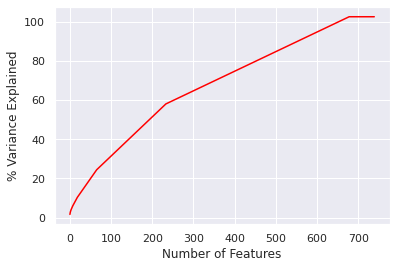

Sum of the percentage of variance, not standardized data: 1.0


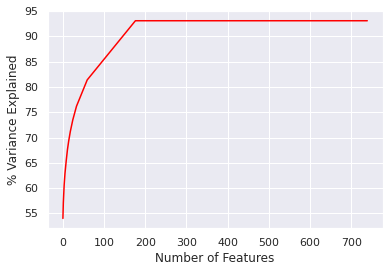

In [40]:
from sklearn.decomposition import PCA

c = 740
pca = PCA(n_components = c)

X_standardized_pca = pca.fit_transform(X_standardized)
X_standardized_data_test = pca.transform(data_test_standardized)
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
print("Sum of the percentage of variance, standardized data: %s" % sum(pca.explained_variance_ratio_).round(2))
plt.plot(var, c = 'red')
plt.xlabel('Number of Features')
plt.ylabel('% Variance Explained')
plt.show()
X_pca = pca.fit_transform(X)
X_data_set = pca.transform(data_test)
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
print("Sum of the percentage of variance, not standardized data: %s" % sum(pca.explained_variance_ratio_).round(2))
plt.plot(var, c = 'red')
plt.xlabel('Number of Features')
plt.ylabel('% Variance Explained')
plt.show()


We will be testing our models using:
* Non-standardized data
* Standardized data (StandardScaler)

In [41]:
scoring = {'accuracy': make_scorer(accuracy_score), 
           'precision': make_scorer(precision_score, average='weighted', zero_division = 0), 
           'recall': make_scorer(recall_score, average='weighted', zero_division = 0), 
           'f1': make_scorer(f1_score, average='weighted', zero_division = 0)}

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=randNum)
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(X_standardized_pca, y, test_size=0.2, random_state=randNum)

data_to_fit = [("Not standardized data", X_train, X_test, y_train, y_test),
               ("Standardized", X_train_st, X_test_st, y_train_st, y_test_st)]

holdOutSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=randNum)
kfoldSplit = KFold(n_splits=10, random_state=randNum, shuffle=True)

def show_results(grid_results, titlePlot):
    results = pd.DataFrame(grid_results.cv_results_['params'])
    results['Accuracy Score'] = grid_results.cv_results_['mean_test_accuracy']
    results['Precision'] = grid_results.cv_results_['mean_test_precision']
    results['Recall'] = grid_results.cv_results_['mean_test_recall']
    results['F1'] = grid_results.cv_results_['mean_test_f1']
    results['Runtime'] = grid_results.cv_results_['mean_fit_time']

    results = results.sort_values(['Accuracy Score', 'Precision', 'Recall', 'F1', 'Runtime'] , ascending = False).reset_index(drop = True)
    display(results)
    
    results['params'] = results[results.columns[0:results.shape[1]-5]].apply(lambda x: ', '.join(x.astype(str)), axis=1)

    fig, ax = plt.subplots(figsize=(14, 9))
    iterator = 1
    for combination, acc_score in zip(results['params'], results['Accuracy Score']):
        ax.scatter(iterator, acc_score, label=combination, s=65, edgecolors='none')
        iterator += 1
    ax.legend(title=", ".join(results.iloc[:, 0:results.shape[1]-6]), fontsize='small')
    ax.grid(which='major', linestyle='-', linewidth='0.2', color='gray')
    ax.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
    plt.xlabel('Model')
    plt.ylabel('Accuracy Score')
    plt.title(titlePlot)
    plt.show()

Best score: 0.600000 using {'C': 100.0, 'multi_class': 'ovr'}
Accuracy score in testing data: 0.62
Model tuning time: 34.68s


,C,multi_class,Accuracy Score,Precision,Recall,F1,Runtime
0,100.0,ovr,0.600000,0.598194,0.600000,0.564782,12.588881
1,500.0,ovr,0.583333,0.599444,0.583333,0.560238,10.406592
2,500.0,multinomial,0.583333,0.587639,0.583333,0.545238,8.783011
3,1.0,ovr,0.583333,0.554583,0.583333,0.542897,14.398908
4,100.0,multinomial,0.575000,0.580000,0.575000,0.536667,6.605975
5,0.1,ovr,0.575000,0.542381,0.575000,0.531548,13.177486
6,1.0,multinomial,0.566667,0.557520,0.566667,0.524782,10.885260
7,0.1,multinomial,0.558333,0.553770,0.558333,0.516548,9.814211


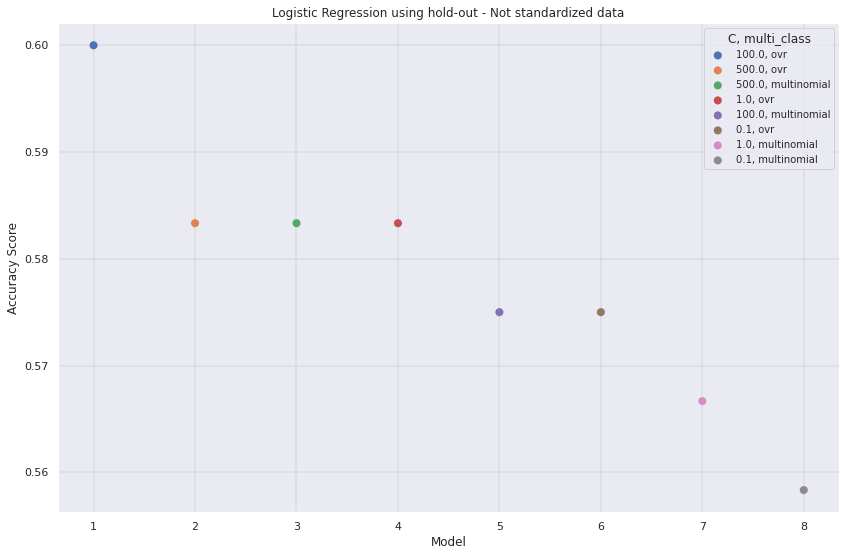

Best score: 0.700000 using {'C': 500.0, 'multi_class': 'multinomial'}
Accuracy score in testing data: 0.76
Model tuning time: 13.67s


,C,multi_class,Accuracy Score,Precision,Recall,F1,Runtime
0,500.0,multinomial,0.700000,0.727500,0.700000,0.681250,1.067256
1,100.0,multinomial,0.683333,0.701458,0.683333,0.659926,1.263308
2,100.0,ovr,0.666667,0.690020,0.666667,0.641984,9.458901
3,1.0,ovr,0.666667,0.674742,0.666667,0.639484,10.578429
4,0.1,ovr,0.658333,0.676131,0.658333,0.634325,10.205459
5,1.0,multinomial,0.658333,0.672242,0.658333,0.633512,2.101230
6,0.1,multinomial,0.650000,0.665298,0.650000,0.626131,2.640857
7,500.0,ovr,0.641667,0.630575,0.641667,0.607540,8.683328


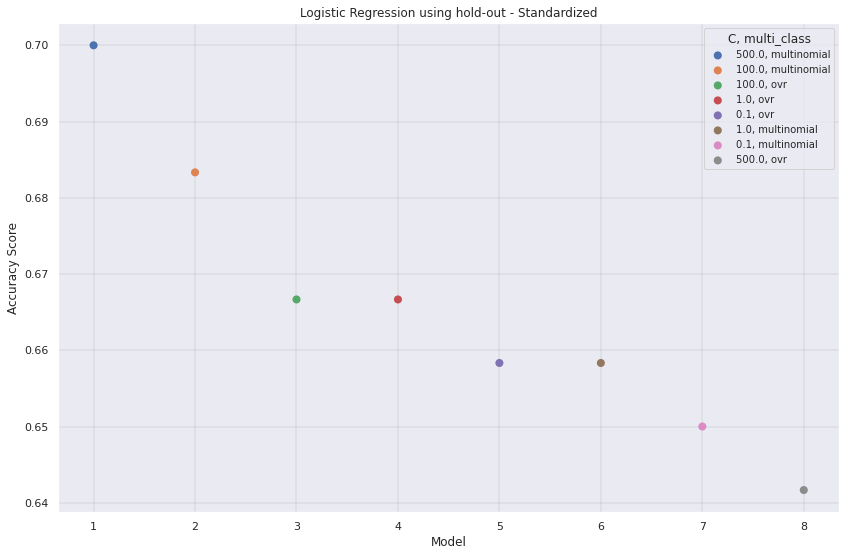

In [42]:
# Tuning algorithm - Logistic Regression Hold-out
for label, X_train, X_test, y_train, y_test in data_to_fit:
    t0 = time.time()
    paramGridLR_h = dict(C=np.array([0.1, 1, 100, 500]),
                         multi_class=np.array(["multinomial", "ovr"]))

    modelLR_h = LogisticRegression(random_state=randNum, penalty = "l2", solver = "newton-cg")
    gridLR_h = GridSearchCV(estimator=modelLR_h,
                            param_grid=paramGridLR_h,
                            cv=holdOutSplit,
                            n_jobs = -1,
                            scoring=scoring,
                            refit='accuracy')
    grid_result_LR_h = gridLR_h.fit(X_train, y_train)

    print("Best score: %f using %s" % (grid_result_LR_h.best_score_, grid_result_LR_h.best_params_))
    print("Accuracy score in testing data:", (grid_result_LR_h.score(X_test, y_test)))    
    print ('Model tuning time: %.2fs' % (time.time() - t0))
    show_results(grid_result_LR_h, 'Logistic Regression using hold-out - ' + label)

Best score: 0.555000 using {'C': 0.1, 'multi_class': 'ovr'}
Accuracy score in testing data: 0.6333333333333333
Model tuning time: 288.83s


,C,multi_class,Accuracy Score,Precision,Recall,F1,Runtime
0,0.1,ovr,0.555000,0.607250,0.555000,0.547171,14.818248
1,1.0,ovr,0.555000,0.606694,0.555000,0.546052,16.855362
2,500.0,ovr,0.548333,0.601389,0.548333,0.540214,19.328959
3,100.0,ovr,0.546667,0.596944,0.546667,0.537381,18.579301
4,500.0,multinomial,0.543333,0.598806,0.543333,0.536135,6.144251
5,100.0,multinomial,0.541667,0.597972,0.541667,0.535135,10.276576
6,1.0,multinomial,0.536667,0.594278,0.536667,0.530783,12.247230
7,0.1,multinomial,0.523333,0.580250,0.523333,0.518061,12.471005


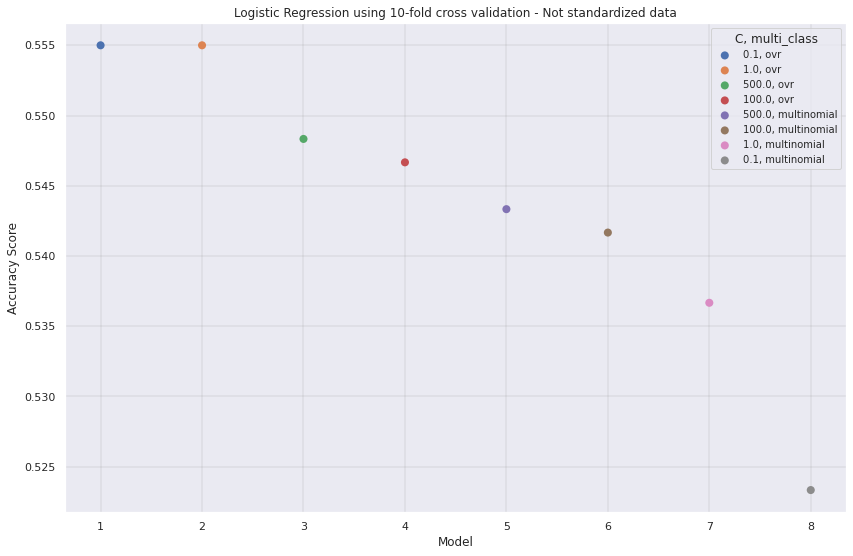

Best score: 0.683333 using {'C': 100.0, 'multi_class': 'ovr'}
Accuracy score in testing data: 0.7466666666666667
Model tuning time: 142.36s


,C,multi_class,Accuracy Score,Precision,Recall,F1,Runtime
0,100.0,ovr,0.683333,0.751821,0.683333,0.682389,12.410312
1,500.0,ovr,0.680000,0.749722,0.680000,0.678341,11.675005
2,100.0,multinomial,0.668333,0.755238,0.668333,0.673763,1.584051
3,500.0,multinomial,0.666667,0.752738,0.666667,0.671397,1.142261
4,1.0,ovr,0.665000,0.745016,0.665000,0.668302,11.470708
5,0.1,ovr,0.646667,0.726683,0.646667,0.647485,10.736894
6,1.0,multinomial,0.630000,0.709794,0.630000,0.631239,2.173450
7,0.1,multinomial,0.610000,0.689599,0.610000,0.608032,2.330454


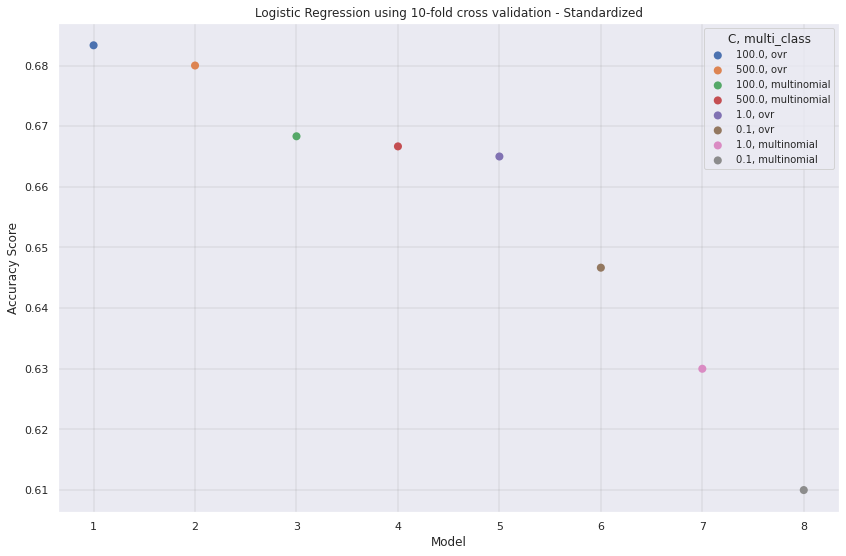

In [43]:
# Tuning algorithm - Logistic Regression 10-fold CV
for label, X_train, X_test, y_train, y_test in data_to_fit:
    t0 = time.time()
    paramGridLR_cv = dict(C=np.array([0.1, 1, 100, 500]),
                         multi_class=np.array(["multinomial", "ovr"]))

    modelLR_cv = LogisticRegression(random_state=randNum, penalty = "l2", solver = "newton-cg")
    gridLR_cv = GridSearchCV(estimator=modelLR_cv,
                             param_grid=paramGridLR_cv,
                             cv=kfoldSplit,
                             scoring=scoring,
                             n_jobs = -1,
                             refit='accuracy')
    grid_result_LR_cv = gridLR_cv.fit(X_train, y_train)

    print("Best score: %f using %s" % (grid_result_LR_cv.best_score_, grid_result_LR_cv.best_params_))
    print("Accuracy score in testing data:", (grid_result_LR_cv.score(X_test, y_test)))    
    print ('Model tuning time: %.2fs' % (time.time() - t0))
    show_results(grid_result_LR_cv, 'Logistic Regression using 10-fold cross validation - ' + label)

Best score: 0.550000 using {'C': 0.1, 'fit_intercept': True}
Accuracy score in testing data: 0.6
Model tuning time: 353.95s


,C,fit_intercept,Accuracy Score,Precision,Recall,F1,Runtime
0,10.0,False,0.55,0.589345,0.55,0.532646,120.258259
1,1.0,False,0.55,0.589345,0.55,0.532646,119.640525
2,0.1,False,0.55,0.589345,0.55,0.532646,118.776829
3,100.0,False,0.55,0.589345,0.55,0.532646,116.567572
4,0.1,True,0.55,0.572361,0.55,0.528472,91.899403
5,10.0,True,0.55,0.571667,0.55,0.528393,101.889155
6,100.0,True,0.55,0.571667,0.55,0.528393,97.495662
7,1.0,True,0.55,0.571667,0.55,0.528393,96.726322


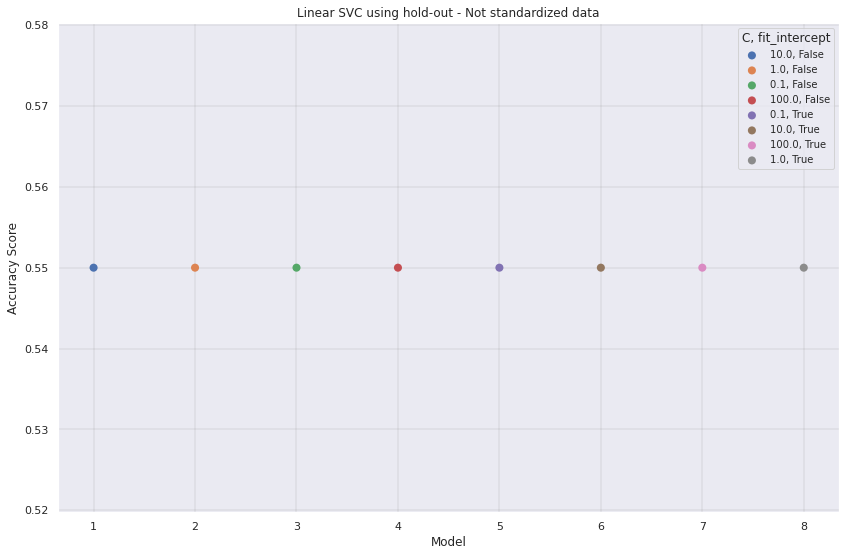

Best score: 0.708333 using {'C': 0.1, 'fit_intercept': True}
Accuracy score in testing data: 0.7733333333333333
Model tuning time: 93.50s


,C,fit_intercept,Accuracy Score,Precision,Recall,F1,Runtime
0,10.0,False,0.708333,0.753889,0.708333,0.695,28.044842
1,100.0,False,0.708333,0.753889,0.708333,0.695,27.741567
2,1.0,False,0.708333,0.753889,0.708333,0.695,27.067192
3,0.1,False,0.708333,0.753889,0.708333,0.695,26.263587
4,1.0,True,0.708333,0.753889,0.708333,0.695,23.140275
5,100.0,True,0.708333,0.753889,0.708333,0.695,22.954458
6,0.1,True,0.708333,0.753889,0.708333,0.695,22.700395
7,10.0,True,0.708333,0.753889,0.708333,0.695,21.453795


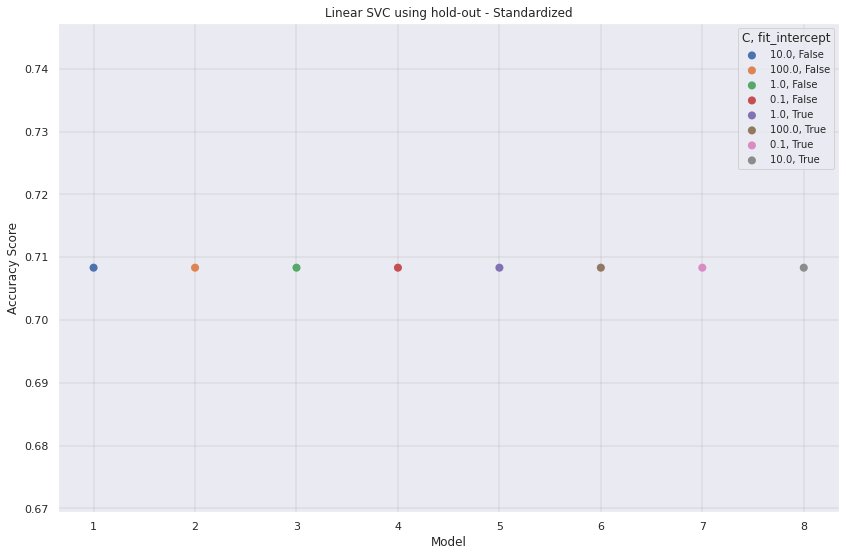

In [44]:
# Tuning algorithm - LinearSVC Hold-Out
for label, X_train, X_test, y_train, y_test in data_to_fit:
    t0 = time.time()
    paramGridLinearSVC_h = dict(fit_intercept=np.array([True, False]),
                                C=np.array([0.1, 1, 10, 100]))

    modelLinearSVC_h = LinearSVC(random_state=randNum, max_iter=1e5, tol=1e-2)
    gridLinearSVC_h = GridSearchCV(estimator=modelLinearSVC_h,
                                   param_grid=paramGridLinearSVC_h,
                                   cv=holdOutSplit,
                                   scoring=scoring,
                                   n_jobs = -1,
                                   refit='accuracy')
    grid_result_LinearSVC_h = gridLinearSVC_h.fit(X_train, y_train)

    print("Best score: %f using %s" % (grid_result_LinearSVC_h.best_score_, grid_result_LinearSVC_h.best_params_))
    print("Accuracy score in testing data:", (grid_result_LinearSVC_h.score(X_test, y_test)))    
    print ('Model tuning time: %.2fs' % (time.time() - t0))
    show_results(grid_result_LinearSVC_h, 'Linear SVC using hold-out - ' + label)

Best score: 0.516667 using {'C': 0.1, 'fit_intercept': False}
Accuracy score in testing data: 0.6466666666666666
Model tuning time: 2996.31s


,C,fit_intercept,Accuracy Score,Precision,Recall,F1,Runtime
0,0.1,False,0.516667,0.577444,0.516667,0.509516,153.396222
1,100.0,False,0.515000,0.572639,0.515000,0.507183,155.475312
2,10.0,False,0.515000,0.572639,0.515000,0.507183,155.317773
3,1.0,False,0.515000,0.572639,0.515000,0.507183,155.222165
4,10.0,True,0.511667,0.575321,0.511667,0.505280,127.559862
5,100.0,True,0.511667,0.575321,0.511667,0.505280,127.358759
6,1.0,True,0.511667,0.575321,0.511667,0.505280,126.869249
7,0.1,True,0.511667,0.575183,0.511667,0.505113,122.613743


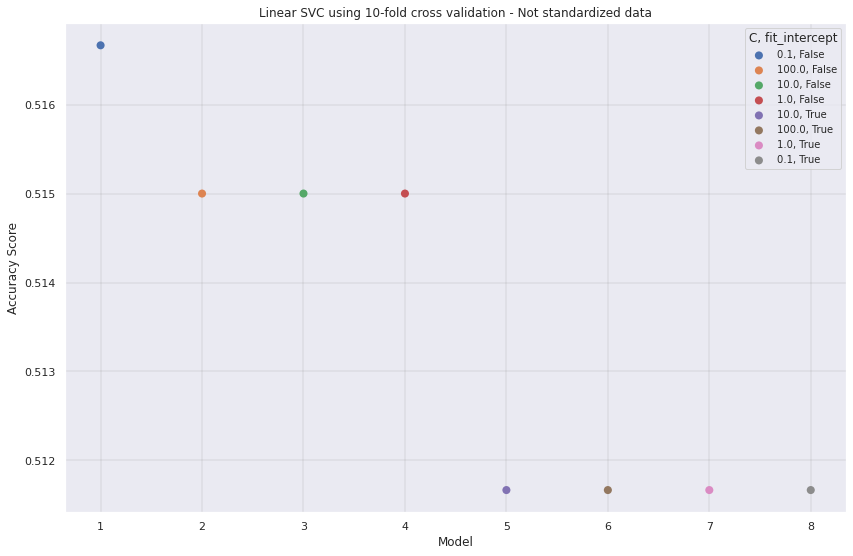

Best score: 0.706667 using {'C': 0.1, 'fit_intercept': False}
Accuracy score in testing data: 0.7733333333333333
Model tuning time: 602.28s


,C,fit_intercept,Accuracy Score,Precision,Recall,F1,Runtime
0,1.0,False,0.706667,0.764806,0.706667,0.706127,29.195839
1,0.1,False,0.706667,0.764806,0.706667,0.706127,27.690087
2,10.0,False,0.705000,0.763139,0.705000,0.704460,28.264872
3,100.0,False,0.705000,0.763139,0.705000,0.704460,28.182754
4,0.1,True,0.703333,0.765222,0.703333,0.704563,24.040944
5,100.0,True,0.701667,0.762722,0.701667,0.702896,25.758920
6,1.0,True,0.701667,0.762722,0.701667,0.702896,25.509813
7,10.0,True,0.701667,0.762722,0.701667,0.702896,24.804695


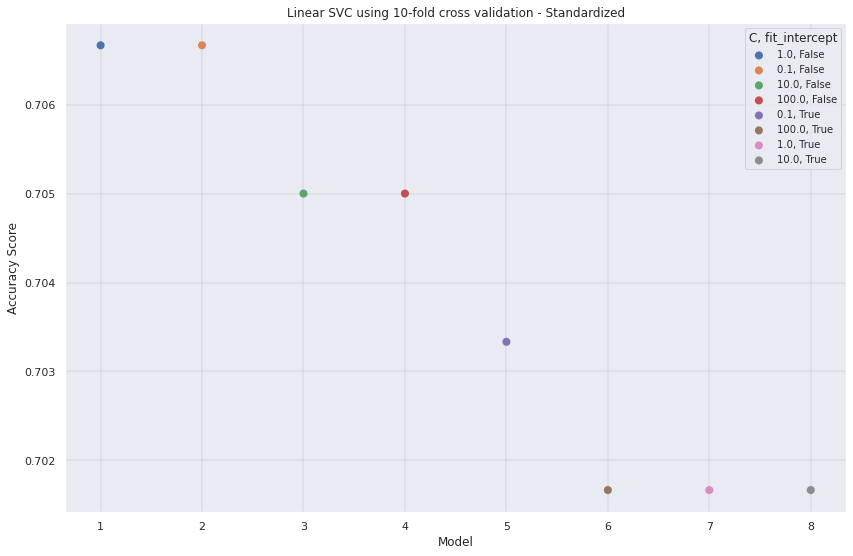

In [45]:
# Tuning algorithm - LinearSVC 10-fold CV
for label, X_train, X_test, y_train, y_test in data_to_fit:
    t0 = time.time()
    paramGridLinearSVC_cv = dict(fit_intercept=np.array([True, False]),
                                 C=np.array([0.1, 1, 10, 100]))

    modelLinearSVC_cv = LinearSVC(random_state=randNum, max_iter = 1e5, tol=1e-2)
    gridLinearSVC_cv = GridSearchCV(estimator=modelLinearSVC_cv,
                                    param_grid=paramGridLinearSVC_cv,
                                    cv=kfoldSplit,
                                    scoring=scoring,
                                    n_jobs = -1,
                                    refit='accuracy')
    grid_result_LinearSVC_cv = gridLinearSVC_cv.fit(X_train, y_train)

    print("Best score: %f using %s" % (grid_result_LinearSVC_cv.best_score_, grid_result_LinearSVC_cv.best_params_))
    print("Accuracy score in testing data:", (grid_result_LinearSVC_cv.score(X_test, y_test)))
    print ('Model tuning time: %.2fs' % (time.time() - t0))
    show_results(grid_result_LinearSVC_cv, 'Linear SVC using 10-fold cross validation - ' + label)

Best score: 0.108333 using {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 100}
Accuracy score in testing data: 0.12666666666666668
Model tuning time: 18.32s


,criterion,max_depth,n_estimators,Accuracy Score,Precision,Recall,F1,Runtime
0,gini,20,100,0.108333,0.079365,0.108333,0.089008,3.848594
1,gini,5,100,0.100000,0.081659,0.100000,0.077558,1.555254
2,entropy,20,100,0.091667,0.080278,0.091667,0.080536,7.077757
3,entropy,10,100,0.083333,0.056875,0.083333,0.064744,9.733288
4,entropy,5,100,0.083333,0.042284,0.083333,0.054071,10.443585
5,entropy,10,50,0.075000,0.060655,0.075000,0.063869,6.231158
6,gini,10,100,0.075000,0.052361,0.075000,0.059206,2.271580
7,entropy,20,50,0.066667,0.056509,0.066667,0.051249,5.956354
8,gini,10,50,0.066667,0.049058,0.066667,0.053474,1.286907
9,entropy,5,50,0.050000,0.037321,0.050000,0.040275,4.931190


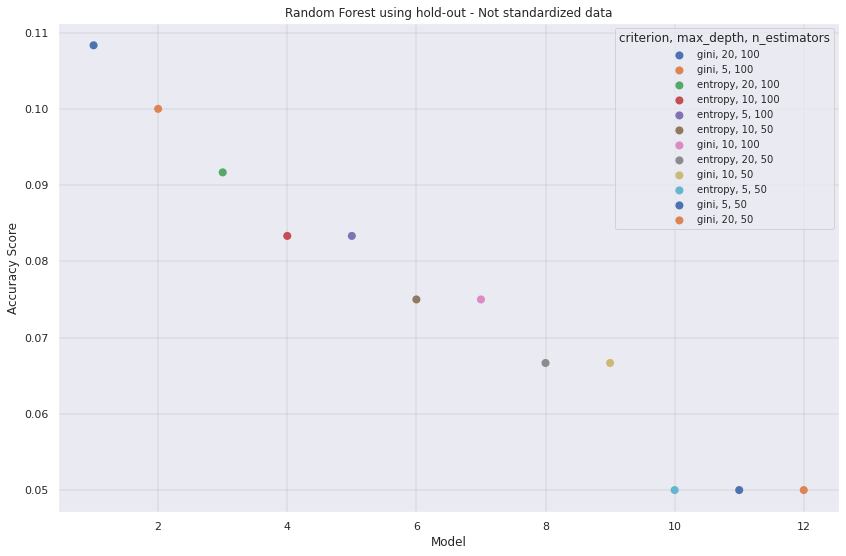

Best score: 0.233333 using {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 100}
Accuracy score in testing data: 0.25333333333333335
Model tuning time: 19.69s


,criterion,max_depth,n_estimators,Accuracy Score,Precision,Recall,F1,Runtime
0,entropy,5,100,0.233333,0.146062,0.233333,0.172724,9.992710
1,gini,10,100,0.225000,0.198204,0.225000,0.194803,2.650509
2,gini,20,100,0.208333,0.156726,0.208333,0.168377,3.751315
3,entropy,5,50,0.200000,0.147479,0.200000,0.159097,4.979864
4,gini,10,50,0.191667,0.175486,0.191667,0.159255,1.159510
5,entropy,10,100,0.191667,0.158353,0.191667,0.160198,9.383428
6,gini,5,100,0.191667,0.104454,0.191667,0.129499,1.533729
7,gini,20,50,0.183333,0.122817,0.183333,0.142500,1.842572
8,entropy,20,100,0.183333,0.121835,0.183333,0.140184,6.660379
9,gini,5,50,0.175000,0.125934,0.175000,0.136706,0.868896


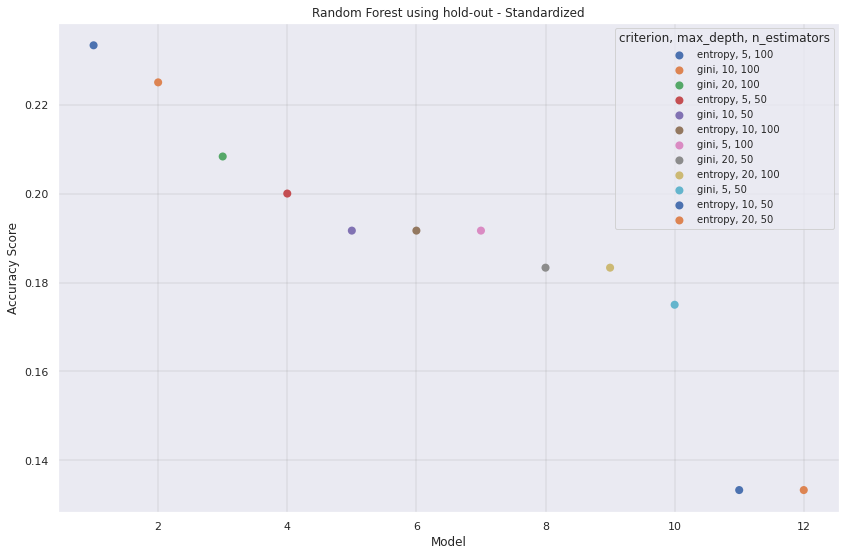

In [46]:
# Tuning algorithm - Random Forest Hold-Out
for label, X_train, X_test, y_train, y_test in data_to_fit:
    t0 = time.time()
    paramGridRF_h = dict(n_estimators=np.array([50, 100]),
                         criterion=np.array(["gini", "entropy"]),
                         max_depth=np.array([5, 10, 20]))

    modelRF_h = RandomForestClassifier(random_state=randNum, n_jobs=-1)
    gridRF_h = GridSearchCV(estimator=modelRF_h,
                            param_grid=paramGridRF_h,
                            cv=holdOutSplit,
                            scoring=scoring,
                            n_jobs = -1,
                            refit='accuracy')
    grid_result_RF_h = gridRF_h.fit(X_train, y_train)

    print("Best score: %f using %s" % (grid_result_RF_h.best_score_, grid_result_RF_h.best_params_))
    print("Accuracy score in testing data:", (grid_result_RF_h.score(X_test, y_test)))
    print ('Model tuning time: %.2fs' % (time.time() - t0))
    show_results(grid_result_RF_h, 'Random Forest using hold-out - ' + label)

Best score: 0.096667 using {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 100}
Accuracy score in testing data: 0.12666666666666668
Model tuning time: 191.38s


,criterion,max_depth,n_estimators,Accuracy Score,Precision,Recall,F1,Runtime
0,gini,20,100,0.096667,0.121147,0.096667,0.087907,4.704318
1,gini,20,50,0.090000,0.102833,0.090000,0.083349,2.244125
2,entropy,5,100,0.086667,0.073566,0.086667,0.068802,12.009789
3,gini,10,100,0.078333,0.077619,0.078333,0.067450,2.890908
4,gini,10,50,0.071667,0.079976,0.071667,0.061257,1.338443
5,entropy,20,100,0.070000,0.071694,0.070000,0.059287,13.001884
6,entropy,10,100,0.066667,0.075389,0.066667,0.056865,13.626881
7,entropy,20,50,0.065000,0.067132,0.065000,0.055698,7.070610
8,gini,5,100,0.063333,0.054205,0.063333,0.050292,1.640652
9,entropy,5,50,0.061667,0.064925,0.061667,0.054653,6.125221


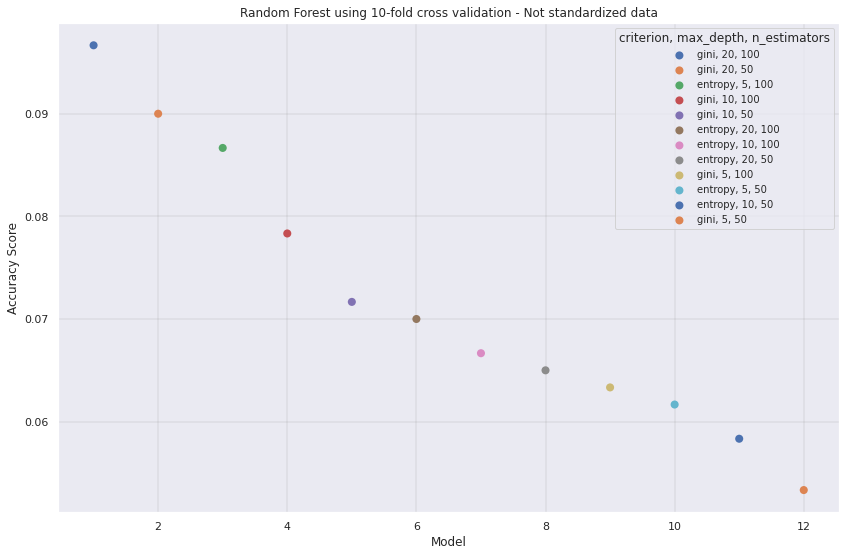

Best score: 0.185000 using {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 100}
Accuracy score in testing data: 0.25333333333333335
Model tuning time: 186.89s


,criterion,max_depth,n_estimators,Accuracy Score,Precision,Recall,F1,Runtime
0,entropy,5,100,0.185000,0.197620,0.185000,0.168769,11.818890
1,entropy,5,50,0.173333,0.183683,0.173333,0.155671,5.796258
2,gini,20,100,0.161667,0.168210,0.161667,0.144821,4.322872
3,gini,10,100,0.150000,0.141519,0.150000,0.129752,2.808075
4,entropy,10,100,0.148333,0.169610,0.148333,0.137410,13.243978
5,entropy,20,100,0.145000,0.142714,0.145000,0.124933,12.390891
6,gini,20,50,0.128333,0.135028,0.128333,0.114690,2.153457
7,gini,5,100,0.128333,0.135328,0.128333,0.109718,1.665296
8,gini,10,50,0.126667,0.122583,0.126667,0.110849,1.315038
9,gini,5,50,0.118333,0.115099,0.118333,0.103841,0.881532


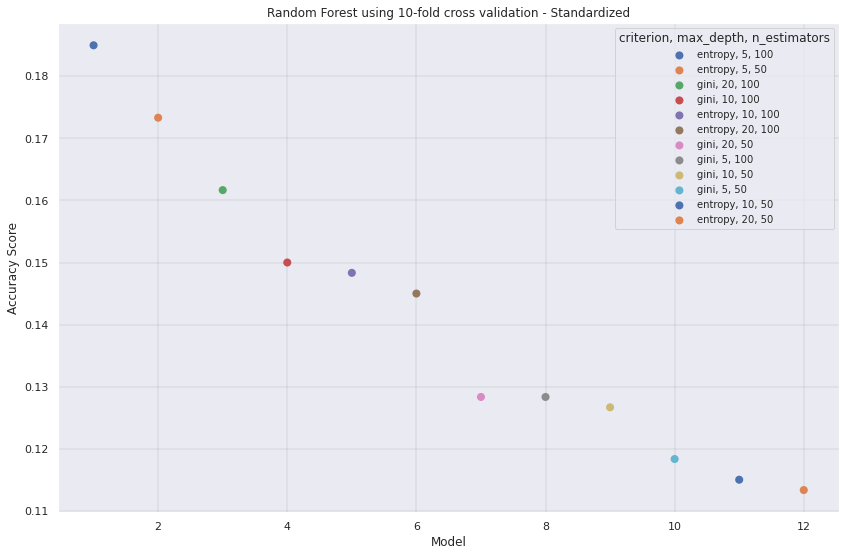

In [47]:
# Tuning algorithm - Random Forest 10-fold CV
for label, X_train, X_test, y_train, y_test in data_to_fit:
    t0 = time.time()
    paramGridRF_cv = dict(n_estimators=np.array([50, 100]),
                          criterion=np.array(["gini", "entropy"]),
                          max_depth=np.array([5, 10, 20]),
                         )

    modelRF_cv = RandomForestClassifier(random_state=randNum, n_jobs=-1)
    gridRF_cv = GridSearchCV(estimator=modelRF_cv,
                             param_grid=paramGridRF_cv,
                             cv=kfoldSplit,
                             scoring=scoring,
                             n_jobs = -1,
                             refit='accuracy')
    grid_result_RF_cv = gridRF_cv.fit(X_train, y_train)

    print("Best score: %f using %s" % (grid_result_RF_cv.best_score_, grid_result_RF_cv.best_params_))
    print("Accuracy score in testing data:", (grid_result_RF_cv.score(X_test, y_test)))
    print ('Model tuning time: %.2fs' % (time.time() - t0))
    show_results(grid_result_RF_cv, 'Random Forest using 10-fold cross validation - ' + label)

### Best Model Selection
From the results above, we can see that when the models were created using standardized data as input, they were 11-17.3% more accurate in unseen test data, so we will focus on the models that were created using this data as input.

From the results of the algorithms above we can see that **LinearSVC** produced better results than the other classifiers in unseen test data for both CV and holdout methods. We had the same accuracy score from the best models, for both 10-fold CV and hold-out methods (77.3%). 

The parameters of the best model will be selected from 10-fold cross validation, since they were tested on multiple train/test splits.

The best model parameters are: C = 1, fit_intercept = False, random_state=1234, max_iter = 1e5, tol=1e-2. We will fit this model using all data we have, and then predict the results of test data to upload to kaggle.

P.S. we fit the model with just 0.80 of our data (train split), but it didn't produce good results in kaggle. So we fit the model with 100% of our data and using LinearSVC algorithm with the best parameters selected above, and we had way better results in the kaggle leaderboard.

In [49]:
model = LinearSVC(C = 1, fit_intercept = False, random_state=1234, max_iter=1e5, tol = 1e-2).fit(X_standardized_pca, y)
model_prediction = model.predict(X_standardized_data_test)
submission = pd.DataFrame(data=model_prediction, columns=['Class'])
submission.head()
submission['ID'] = test['ID']
submission.set_index('ID', inplace=True)
submission.head()
submission.to_csv('amazon_reviews_gr24_submission.csv')

In [50]:
model = LinearSVC(C = 1, fit_intercept = False, random_state=1234, max_iter=1e5, tol = 1e-2).fit(X_train_st, y_train_st)
model_prediction = model.predict(X_standardized_data_test)
submission = pd.DataFrame(data=model_prediction, columns=['Class'])
submission.head()
submission['ID'] = test['ID']
submission.set_index('ID', inplace=True)
submission.head()
submission.to_csv('amazon_reviews_gr24_submission_train_data.csv')